In [1]:
import warnings
warnings.filterwarnings(action='ignore') 
import pandas as pd
from numpy import std, mean, sqrt
from scipy import stats
import numpy as np
from itertools import combinations
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from scipy.stats import pearsonr 
from scipy.stats import f_oneway
from pingouin import compute_effsize
import pingouin as pg
from scipy.stats.mstats import kruskalwallis
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
import logging

'\nax[0,1].text(0.05, 1.3, "$^{***}$")\nax[0,1].text(1.1, 0.6, \'$Cohen\'$s $d(col,row)$\')\n'

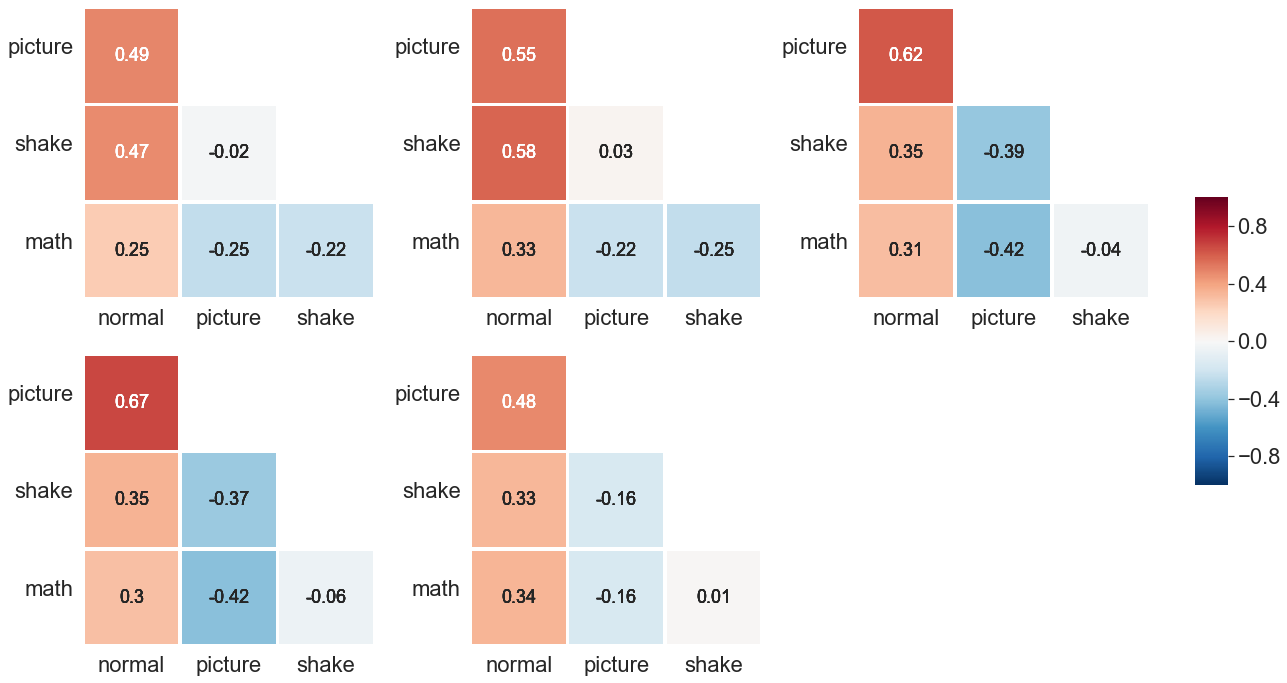

In [100]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
for i in [0,1]:
    for j in [0,1,2]:
        axes[i,j].set_facecolor("white")
#sns.set(rc={'figure.figsize':(13,13)}, font_scale = 1.5, yticklabels=)
#fig.subplots_adjust(bottom=0.45, right=0.68, top=0.8)
#plt.xticks(np.arange(0, 2, 0.5), rotation=90)
cbar_ax = fig.add_axes([1.1, .3, .03, .4])
for i, ax in enumerate(axes.flat):
    sns.heatmap(freq_use_days_dunn_matrix.iloc[1:,:-1], mask=mask[1:,:-1], cmap = 'RdBu_r', cbar=i == 0, vmax = 1.0, vmin= -1.0,\
                       linewidth=2.5, annot=True, annot_kws={"size": 18}, square=True, ax=axes[0,0], cbar_ax=None if i else cbar_ax)
    sns.heatmap(prop_use_days_dunn_matrix.iloc[1:,:-1], mask=mask[1:,:-1], cmap = 'RdBu_r', cbar=i == 0, vmax = 1.0, vmin= -1.0,\
                       linewidth=2.5, annot=True, annot_kws={"size": 18}, square=True, ax=axes[0,1], cbar_ax=None if i else cbar_ax)
    sns.heatmap(avg_daily_alarm_dunn_matrix.iloc[1:,:-1], mask=mask[1:,:-1], cmap = 'RdBu_r', cbar=i == 0, vmax = 1.0, vmin= -1.0,\
                       linewidth=2.5, annot=True, annot_kws={"size": 18}, square=True, ax=axes[0,2], cbar_ax=None if i else cbar_ax)
    sns.heatmap(sd_daily_alarm_dunn_matrix.iloc[1:,:-1], mask=mask[1:,:-1], cmap = 'RdBu_r', cbar=i == 0, vmax = 1.0, vmin= -1.0,\
                       linewidth=2.5, annot=True, annot_kws={"size": 18}, square=True, ax=axes[1,0], cbar_ax=None if i else cbar_ax)
    sns.heatmap(sd_ring_hour_dunn_matrix.iloc[1:,:-1], mask=mask[1:,:-1], cmap = 'RdBu_r', cbar=i == 0, vmax = 1.0, vmin= -1.0,\
                       linewidth=2.5, annot=True, annot_kws={"size": 18}, square=True, ax=axes[1,1], cbar_ax=None if i else cbar_ax)
axes = trim_axs(axes,5)
sns.set(font_scale=2)
fig.tight_layout(rect=[0, 0, 1.1, 1])
plt.setp(axes, yticks=np.arange(0.4,3,1))
for ax in fig.axes:
    plt.sca(ax)
    plt.yticks(rotation=0)

'''
ax[0,1].text(0.05, 1.3, "$^{***}$")
ax[0,1].text(1.1, 0.6, '$Cohen\'$s $d(col,row)$')
'''

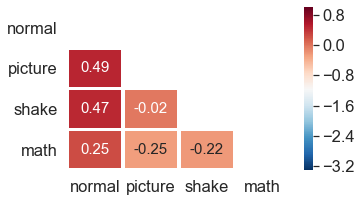

In [11]:
freq_use_days_dunn_matrix = pd.DataFrame({"normal": [0, 0.49, 0.47, 0.25], 
                                         "picture": [0, 0, -0.02, -0.25],
                                         "shake" : [0, 0, 0, -0.22],
                                         'math': [0, 0, 0, 0]})
freq_use_days_dunn_matrix = freq_use_days_dunn_matrix.rename(index={0:'normal',1:'picture',2:'shake',3:'math'})
sns.set(font_scale=1.5)
mask = np.zeros_like(freq_use_days_dunn_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5,3))
ax = sns.heatmap(freq_use_days_dunn_matrix, mask=mask, cmap = 'RdBu_r', vmax = 1.0, vmin= -3.3, linewidth=2.5, annot=True, annot_kws={"size": 15})
ax.set_facecolor("white")

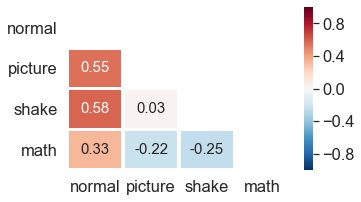

In [12]:
prop_use_days_dunn_matrix = pd.DataFrame({"normal": [0, 0.55, 0.58, 0.33], 
                                         "picture": [0, 0, 0.03, -0.22],
                                         "shake" : [0, 0, 0, -0.25],
                                         'math': [0, 0, 0, 0]})
prop_use_days_dunn_matrix = prop_use_days_dunn_matrix.rename(index={0:'normal',1:'picture',2:'shake',3:'math'})
sns.set(font_scale=1.5)
mask = np.zeros_like(prop_use_days_dunn_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5,3))
ax = sns.heatmap(prop_use_days_dunn_matrix, mask=mask, cmap = 'RdBu_r', vmax = 1.0, vmin= -1, linewidth=2.5, annot=True, annot_kws={"size": 15})
ax.set_facecolor("white")

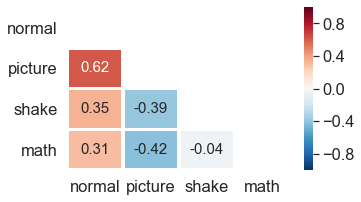

In [13]:
avg_daily_alarm_dunn_matrix = pd.DataFrame({"normal": [0, 0.62, 0.35, 0.31], 
                                         "picture": [0, 0, -0.39, -0.42],
                                         "shake" : [0, 0, 0, -0.04],
                                         'math': [0, 0, 0, 0]})
avg_daily_alarm_dunn_matrix = avg_daily_alarm_dunn_matrix.rename(index={0:'normal',1:'picture',2:'shake',3:'math'})
sns.set(font_scale=1.5)
mask = np.zeros_like(avg_daily_alarm_dunn_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5,3))
ax = sns.heatmap(avg_daily_alarm_dunn_matrix, mask=mask, cmap = 'RdBu_r', vmax = 1.0, vmin= -1, linewidth=2.5, annot=True, annot_kws={"size": 15})
ax.set_facecolor("white")

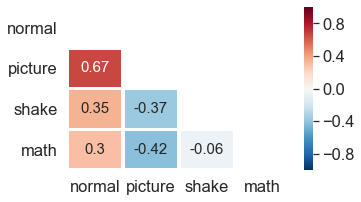

In [14]:
sd_daily_alarm_dunn_matrix = pd.DataFrame({"normal": [0, 0.67, 0.35, 0.30], 
                                         "picture": [0, 0, -0.37, -0.42],
                                         "shake" : [0, 0, 0, -0.06],
                                         'math': [0, 0, 0, 0]})
sd_daily_alarm_dunn_matrix = sd_daily_alarm_dunn_matrix.rename(index={0:'normal',1:'picture',2:'shake',3:'math'})
sns.set(font_scale=1.5)
mask = np.zeros_like(sd_daily_alarm_dunn_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5,3))
ax = sns.heatmap(sd_daily_alarm_dunn_matrix, mask=mask, cmap = 'RdBu_r', vmax = 1.0, vmin= -1, linewidth=2.5, annot=True, annot_kws={"size": 15})
ax.set_facecolor("white")

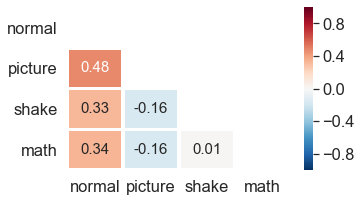

In [15]:
sd_ring_hour_dunn_matrix = pd.DataFrame({"normal": [0, 0.48, 0.33, 0.34], 
                                         "picture": [0, 0, -0.16, -0.16],
                                         "shake" : [0, 0, 0, 0.01],
                                         'math': [0, 0, 0, 0]})
sd_ring_hour_dunn_matrix = sd_ring_hour_dunn_matrix.rename(index={0:'normal',1:'picture',2:'shake',3:'math'})
sns.set(font_scale=1.5)
mask = np.zeros_like(sd_ring_hour_dunn_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5,3))
ax = sns.heatmap(sd_ring_hour_dunn_matrix, mask=mask, cmap = 'RdBu_r', vmax = 1.0, vmin= -1, linewidth=2.5, annot=True, annot_kws={"size": 15})
ax.set_facecolor("white")

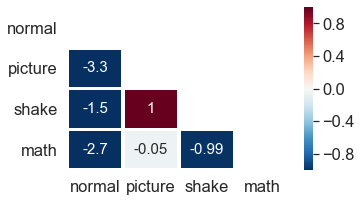

In [16]:
avg_task_completion_time_dunn_matrix = pd.DataFrame({"normal": [0, -3.28, -1.49, -2.74], 
                                         "picture": [0, 0, 1.03, -0.05],
                                         "shake" : [0, 0, 0, -0.99],
                                         'math': [0, 0, 0, 0]})
avg_task_completion_time_dunn_matrix = avg_task_completion_time_dunn_matrix.rename(index={0:'normal',1:'picture',2:'shake',3:'math'})
sns.set(font_scale=1.5)
mask = np.zeros_like(avg_task_completion_time_dunn_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5,3))
ax = sns.heatmap(avg_task_completion_time_dunn_matrix, mask=mask, cmap = 'RdBu_r', vmax = 1, vmin= -1, linewidth=2.5, annot=True, annot_kws={"size": 15})
ax.set_facecolor("white")

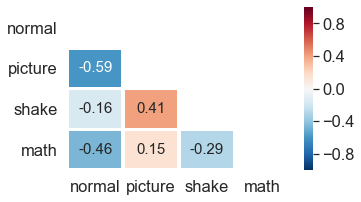

In [17]:
sd_task_completion_time_dunn_matrix = pd.DataFrame({"normal": [0, -0.59, -0.16, -0.46], 
                                         "picture": [0, 0, 0.41, 0.15],
                                         "shake" : [0, 0, 0, -0.29],
                                         'math': [0, 0, 0, 0]})
sd_task_completion_time_dunn_matrix = sd_task_completion_time_dunn_matrix.rename(index={0:'normal',1:'picture',2:'shake',3:'math'})
sns.set(font_scale=1.5)
mask = np.zeros_like(sd_task_completion_time_dunn_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5,3))
ax = sns.heatmap(sd_task_completion_time_dunn_matrix, mask=mask, cmap = 'RdBu_r', vmax = 1.0, vmin= -1.0, linewidth=2.5, annot=True, annot_kws={"size": 15})
ax.set_facecolor("white")

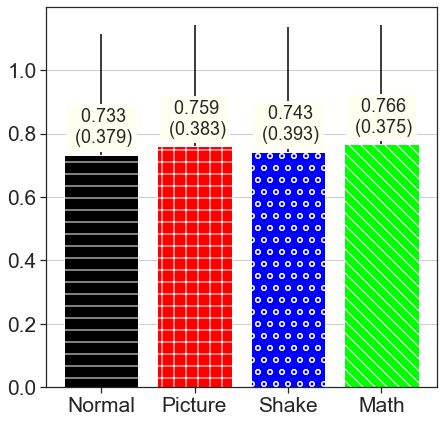

In [40]:
feature = 'prop_recur'
x = [1,2,3,4]
y = [normal_gp[feature].mean(), picture_gp[feature].mean(), shake_gp[feature].mean(), math_gp[feature].mean()]
std = [normal_gp[feature].std(), picture_gp[feature].std(), shake_gp[feature].std(), math_gp[feature].std()]
#std_err = [sem(normal_gp_set[feature]), sem(picture_gp_set[feature]), sem(shake_gp_set[feature]), sem(math_gp_set[feature])]
#ci = [confidence_interval(normal_gp[feature]), confidence_interval(picture_gp[feature]),confidence_interval(shake_gp[feature]), confidence_interval(math_gp[feature])]

bar = plt.grid(b=True, axis='y')
rects = plt.bar(x, height = y, zorder=2, color=['black','red','blue','lime'])
patterns = ('-', '+', 'o', '\\\\\'')
for bar, pattern in zip(rects, patterns):
    bar.set_hatch(pattern)
plt.errorbar(x, y, yerr=std, fmt='none', ecolor='black')    
plt.xticks([1,2,3,4], ['Normal','Picture','Shake','Math'])
plt.xticks(fontsize=18)
plt.yticks(fontsize=17)
plt.ylim(bottom=0)


def autolabel(rects):
    for i in np.arange(len(rects)):
        
        rect = rects[i]
        height = rect.get_height()
        
        txt_str = ' %.3f\n (%.3f)' % (float(height), std[i])
        plt.text(rect.get_x() + rect.get_width()/2, height+0.025,
                txt_str,
                ha='center', va='bottom', fontsize=18, bbox=dict(facecolor='ivory', alpha=1.0))

autolabel(rects)

plt.tick_params(labelsize=21)

plt.rcParams["figure.figsize"] = [7,7]
#plt.savefig('/Users/kyuetaekoh/Google 드라이브(kyuetaekoh@hanyang.ac.kr)/논문/석사졸업논문/correction_3/graph/pdf/{}_barplot.pdf'.format(feature), format='pdf', dpi=1000)
plt.show()


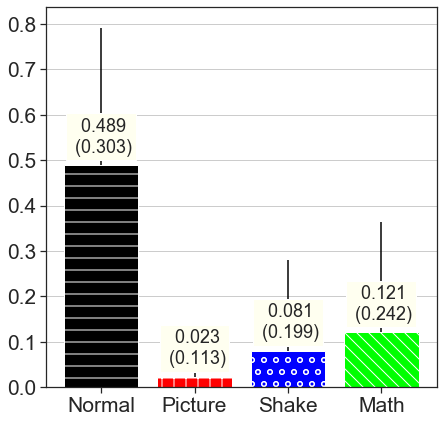

In [31]:
feature = 'prop_use_days'
x = [1,2,3,4]
y = [tmp1[feature].mean(), tmp2[feature].mean(), tmp3[feature].mean(), tmp4[feature].mean()]
std = [tmp1[feature].std(), tmp2[feature].std(), tmp3[feature].std(), tmp4[feature].std()]
#std_err = [sem(normal_gp_set[feature]), sem(picture_gp_set[feature]), sem(shake_gp_set[feature]), sem(math_gp_set[feature])]
#ci = [confidence_interval(normal_gp[feature]), confidence_interval(picture_gp[feature]),confidence_interval(shake_gp[feature]), confidence_interval(math_gp[feature])]

bar = plt.grid(b=True, axis='y')
rects = plt.bar(x, height = y, zorder=2, color=['black','red','blue','lime'])
patterns = ('-', '+', 'o', '\\\\\'')
for bar, pattern in zip(rects, patterns):
    bar.set_hatch(pattern)
plt.errorbar(x, y, yerr=std, fmt='none', ecolor='black')    
plt.xticks([1,2,3,4], ['Normal','Picture','Shake','Math'])
plt.xticks(fontsize=18)
plt.yticks(fontsize=17)
plt.ylim(bottom=0)


def autolabel(rects):
    for i in np.arange(len(rects)):
        
        rect = rects[i]
        height = rect.get_height()
        
        txt_str = ' %.3f\n (%.3f)' % (float(height), std[i])
        plt.text(rect.get_x() + rect.get_width()/2, height+.02,
                txt_str,
                ha='center', va='bottom', fontsize=18, bbox=dict(facecolor='ivory', alpha=1.0))

autolabel(rects)

plt.tick_params(labelsize=21)

plt.rcParams["figure.figsize"] = [7,7]
#plt.savefig('/Users/kyuetaekoh/Google 드라이브(kyuetaekoh@hanyang.ac.kr)/논문/석사졸업논문/correction_3/graph/pdf/{}_barplot.pdf'.format(feature), format='pdf', dpi=1000)
plt.show()